In [39]:
import numpy as np
import pandas as pd


In [40]:
data = pd.read_csv('/content/play_tennis.csv')

In [41]:
data

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [43]:
data['outlook'] = le.fit_transform(data['outlook'])
data['temp'] = le.fit_transform(data['temp'])
data['humidity'] = le.fit_transform(data['humidity'])
data['wind'] = le.fit_transform(data['wind'])
data['play'] = le.fit_transform(data['play'])

In [44]:
data

,day,outlook,temp,humidity,wind,play
0,D1,2,1,0,1,0
1,D2,2,1,0,0,0
2,D3,0,1,0,1,1
3,D4,1,2,0,1,1
4,D5,1,0,1,1,1
5,D6,1,0,1,0,0
6,D7,0,0,1,0,1
7,D8,2,2,0,1,0
8,D9,2,0,1,1,1
9,D10,1,2,1,1,1


In [45]:
x = data.drop(['day','play'],axis = 1)
y = data['play']

In [46]:
x

,outlook,temp,humidity,wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =20 )

In [47]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [48]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [49]:
y_pred = model.predict(x_test)

In [50]:
y_pred

array([0, 1, 1])

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1, 0],
       [0, 2]])

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [54]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred)

1.0

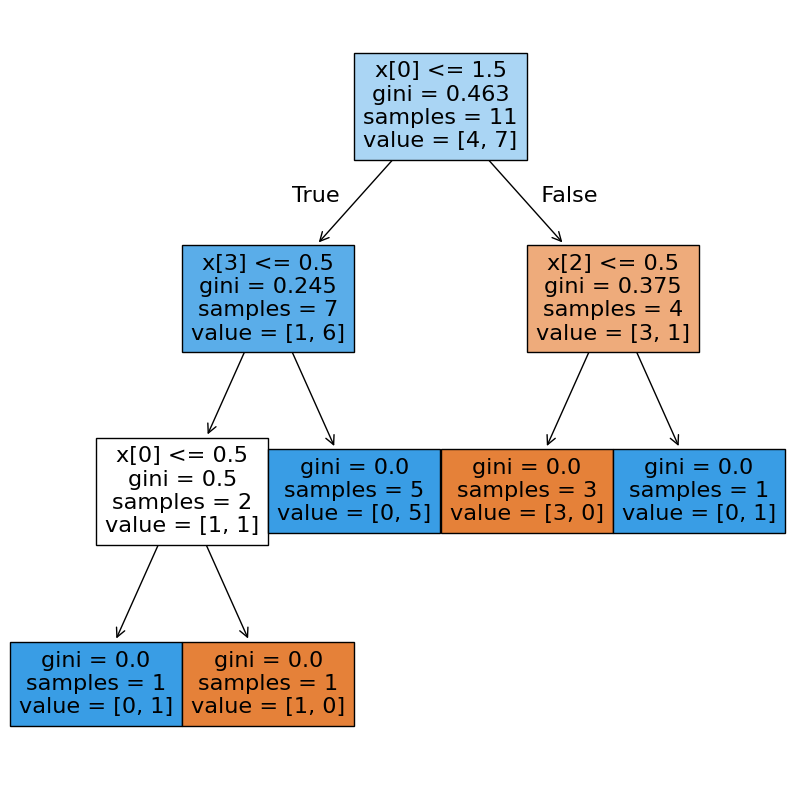

In [56]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plot_tree(model,filled = True)
plt.show()

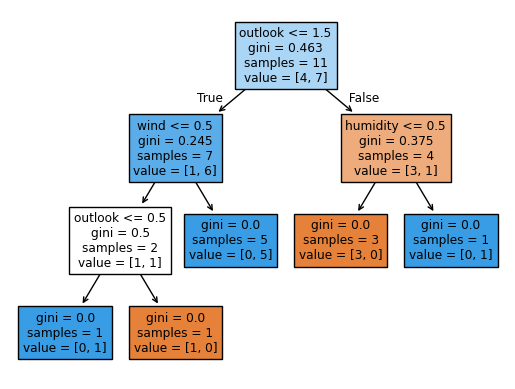

In [57]:
plt.figure()
plot_tree(model,filled = True,feature_names = x.columns)
plt.show()